* データの特徴等の確認

In [2]:
import pandas as pd
df=pd.read_csv("statcast2020-2024_sorted.csv")
pd.set_option('display.max_columns', None)  # カラムの表示制限を解除
pd.set_option('display.width', 1000)        # 横幅も広げる（必要なら）
print(df.head(200))

    pitch_type   game_date  release_speed  release_pos_x  release_pos_z    player_name  batter  pitcher     events    description  spin_dir  spin_rate_deprecated  break_angle_deprecated  break_length_deprecated  zone                                                des game_type stand p_throws home_team away_team type  hit_location      bb_type  balls  strikes  game_year  pfx_x  pfx_z  plate_x  plate_z  on_3b  on_2b  on_1b  outs_when_up  inning inning_topbot    hc_x    hc_y  tfs_deprecated  tfs_zulu_deprecated  umpire  sv_id        vx0         vy0       vz0         ax         ay         az  sz_top  sz_bot  hit_distance_sc  launch_speed  launch_angle  effective_speed  release_spin_rate  release_extension  game_pk  fielder_2  fielder_3  fielder_4  fielder_5  fielder_6  fielder_7  fielder_8  fielder_9  release_pos_y  estimated_ba_using_speedangle  estimated_woba_using_speedangle  woba_value  woba_denom  babip_value  iso_value  launch_speed_angle  at_bat_number  pitch_number  \
0           F

In [3]:
print(df.shape)

(3345239, 114)


In [4]:
#pd.set_option('display.max_rows', 1000)  # 必要なら200以上に
df.isnull().sum().to_csv("null.csv")
df.isnull().sum()

pitch_type                   74036
game_date                        0
release_speed                75280
release_pos_x                75488
release_pos_z                75488
                             ...  
api_break_z_with_gravity     75300
api_break_x_arm              75297
api_break_x_batter_in        75297
arm_angle                   257801
original_index                   0
Length: 114, dtype: int64

In [5]:
print(df.columns.tolist())


['pitch_type', 'game_date', 'release_speed', 'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher', 'events', 'description', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des', 'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'woba_value', 'woba_denom', 'babip_value', 'iso_value', 'launch_speed_a

In [6]:
missing_rate = df.isnull().mean().sort_values(ascending=False)
print(missing_rate)
df_copy = df.copy()
missing_rate.to_csv("null.csv")
print(df_copy.shape)

break_angle_deprecated     1.0
break_length_deprecated    1.0
spin_rate_deprecated       1.0
spin_dir                   1.0
tfs_deprecated             1.0
                          ... 
age_pit                    0.0
age_pit_legacy             0.0
age_bat_legacy             0.0
age_bat                    0.0
original_index             0.0
Length: 114, dtype: float64
(3345239, 114)


In [7]:
drop_clos=[
"break_angle_deprecated","break_length_deprecated",
"spin_rate_deprecated","spin_dir","tfs_deprecated","sv_id",
"tfs_zulu_deprecated","umpire"]#欠損値100%

df_copy.drop(columns=drop_clos, inplace=True)
print(df_copy.shape)
df_copy.to_csv('statcast_data.csv', index=False)

(3345239, 106)


In [8]:
df_copy.describe()


,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,original_index
count,3.269959e+06,3.269751e+06,3.269751e+06,3.345239e+06,3.345239e+06,3.269961e+06,762797.000000,3.345239e+06,3.345239e+06,3.345239e+06,3.269942e+06,3.269953e+06,3.269961e+06,3.269961e+06,315253.000000,631194.000000,1.028945e+06,3.345239e+06,3.345239e+06,589584.000000,589584.000000,3.269961e+06,3.269961e+06,3.269961e+06,3.269961e+06,3.269961e+06,3.269961e+06,3.269961e+06,3.269961e+06,1.077789e+06,1.071319e+06,1.072361e+06,3.262358e+06,3.253977e+06,3.263158e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.269751e+06,563363.000000,805892.000000,874510.000000,809683.000000,874510.000000,874510.000000,563363.000000,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.253941e+06,3.345207e+06,3.345014e+06,474493.000000,473675.000000,563363.000000,3.345014e+06,1.078853e+06,3.345239e+06,3.345239e+06,3.345209e+06,3.345209e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.345239e+06,3.010418e+06,3.128526e+06,3.018310e+06,3.130687e+06,3.269939e+06,3.269942e+06,3.269942e+06,3.087438e+06,3.345239e+06
mean,8.894122e+01,-7.997335e-01,5.802336e+00,6.193935e+05,6.171533e+05,9.083520e+00,5.089597,8.694144e-01,8.912723e-01,2.022288e+03,-1.149005e-01,6.168299e-01,4.345471e-02,2.283174e+00,620975.679077,620965.227976,6.193770e+05,9.807927e-01,4.935275e+00,126.119267,122.420317,2.368943e+00,-1.293589e+02,-3.888345e+00,-2.187015e+00,2.685612e+01,-2.379787e+01,3.385005e+00,1.591851e+00,1.546521e+02,8.245647e+01,1.695929e+01,8.907797e+01,2.248294e+03,6.374307e+00,6.861788e+05,6.072030e+05,6.055006e+05,6.270234e+05,6.188750e+05,6.303562e+05,6.284788e+05,6.392752e+05,6.236023e+05,5.412570e+01,0.323891,0.315326,0.324530,0.995776,0.188094,0.144999,3.197642,3.842892e+01,2.893377e+00,2.179542e+00,2.327761e+00,2.232059e+00,2.275245e+00,2.343323e+00,2.195281e+00,2.263360e+00,2.275245e+00,1.758115e+02,1.138369e-04,2.906299e-04,69.534497,7.219845,0.536995,-2.906299e-04,9.169887e+01,-1.482187e-01,-4.318585e-02,5.064845e-01,5.127466e-01,2.865060e+01,2.809726e+01,2.917891e+01,2.863709e+01,1.457308e+00,1.492970e+00,5.945490e+00,1.720094e+00,6.027765e+00,1.700635e+00,2.310893e+00,3.387911e-01,-1.046692e-01,3.915571e+01,1.672619e+06
std,6.074637e+00,1.859617e+00,5.409688e-01,6.109540e+04,6.188876e+04,4.228099e+00,2.631178,9.671088e-01,8.289399e-01,1.271226e+00,8.839177e-01,7.315802e-01,8.414101e-01,9.736910e-01,60228.455793,60297.916127,6.120614e+04,8.179174e-01,2.588935e+00,40.644519,41.408078,5.804850e+00,8.795400e+00,3.061124e+00,1.072581e+01,4.022168e+00,8.887034e+00,1.846169e-01,1.061297e-01,1.207362e+02,1.529033e+01,3.297038e+01,6.239361e+00,3.441003e+02,4.593033e-01,4.548110e+04,6.481892e+04,6.915787e+04,5.524481e+04,5.697687e+04,5.078612e+04,5.731415e+04,4.82

pitch_type
FF     1090723
SL      547884
SI      507444
CH      357669
FC      244267
CU      233753
ST      131061
NaN      74036
KC       69852
FS       67969
SV       11477
FA        4094
EP        1789
KN        1282
FO         969
CS         475
SC         299
PO         196
Name: count, dtype: int64


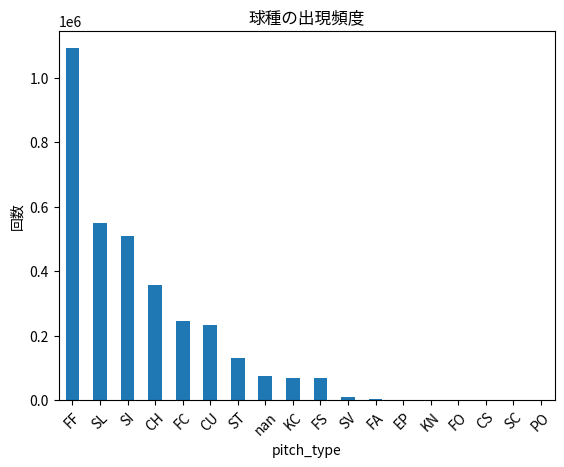

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Noto Sans CJK JP'

# 可視化設定
#sns.set(style="whitegrid")
#plt.rcParams["figure.figsize"] = (12, 6)
print(df_copy["pitch_type"].value_counts(dropna=False))
# ① ターゲット変数の分布（pitch_typeの偏りチェック）
df_copy['pitch_type'].value_counts(dropna=False).plot(kind='bar')
plt.title('球種の出現頻度')
plt.xlabel('pitch_type')
plt.ylabel('回数')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()


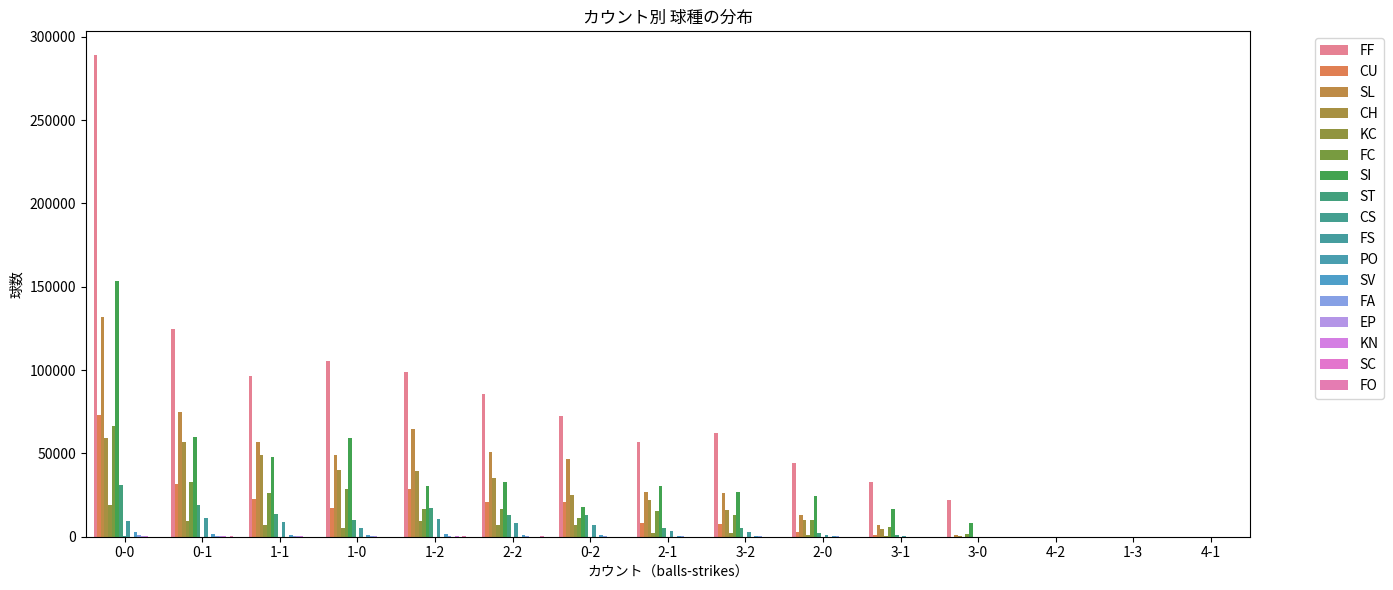

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Noto Sans CJK JP'

# 可視化設定
#sns.set(style="whitegrid")
#plt.rcParams["figure.figsize"] = (12, 6)

# ③ カウント別で球種分布（状況による球種傾向）
count_cols = ['balls', 'strikes']
df_copy['count'] = df_copy['balls'].astype(str) + '-' + df_copy['strikes'].astype(str)

plt.figure(figsize=(14, 6))
sns.countplot(data=df_copy, x='count', hue='pitch_type', order=df_copy['count'].value_counts().index)
plt.title('カウント別 球種の分布')
plt.xlabel('カウント（balls-strikes）')
plt.ylabel('球数')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

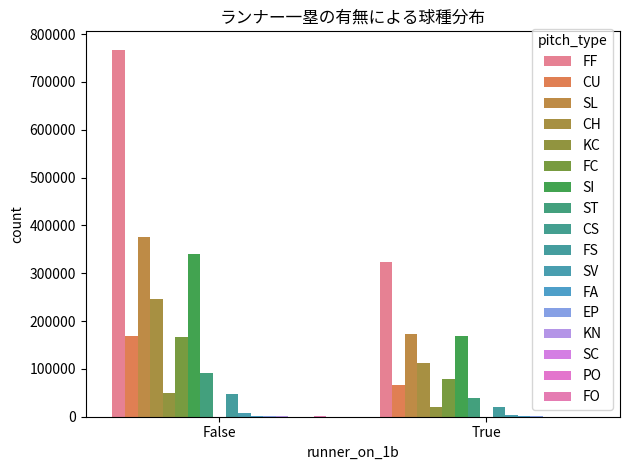

In [11]:
df_copy['runner_on_1b'] = df_copy['on_1b'].notnull()
sns.countplot(data=df_copy, x='runner_on_1b', hue='pitch_type')
plt.title('ランナー一塁の有無による球種分布')
plt.tight_layout()
plt.show()

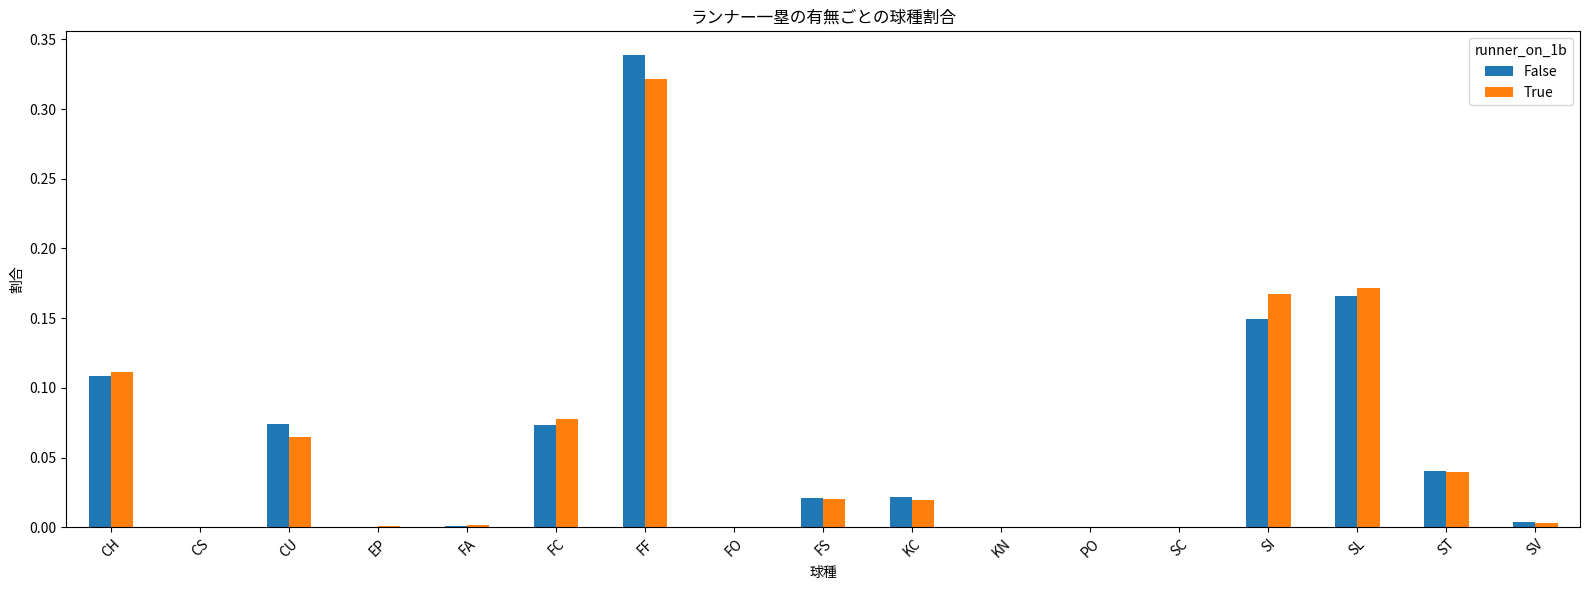

In [12]:
import pandas as pd

# ランナー一塁の有無ごとに球種の比率を計算
runner_pitch_ratio = df_copy.groupby('runner_on_1b')['pitch_type'].value_counts(normalize=True).unstack().T

# 棒グラフで可視化
runner_pitch_ratio.plot(kind='bar', figsize=(16, 6))
plt.title('ランナー一塁の有無ごとの球種割合')
plt.xlabel('球種')
plt.ylabel('割合')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


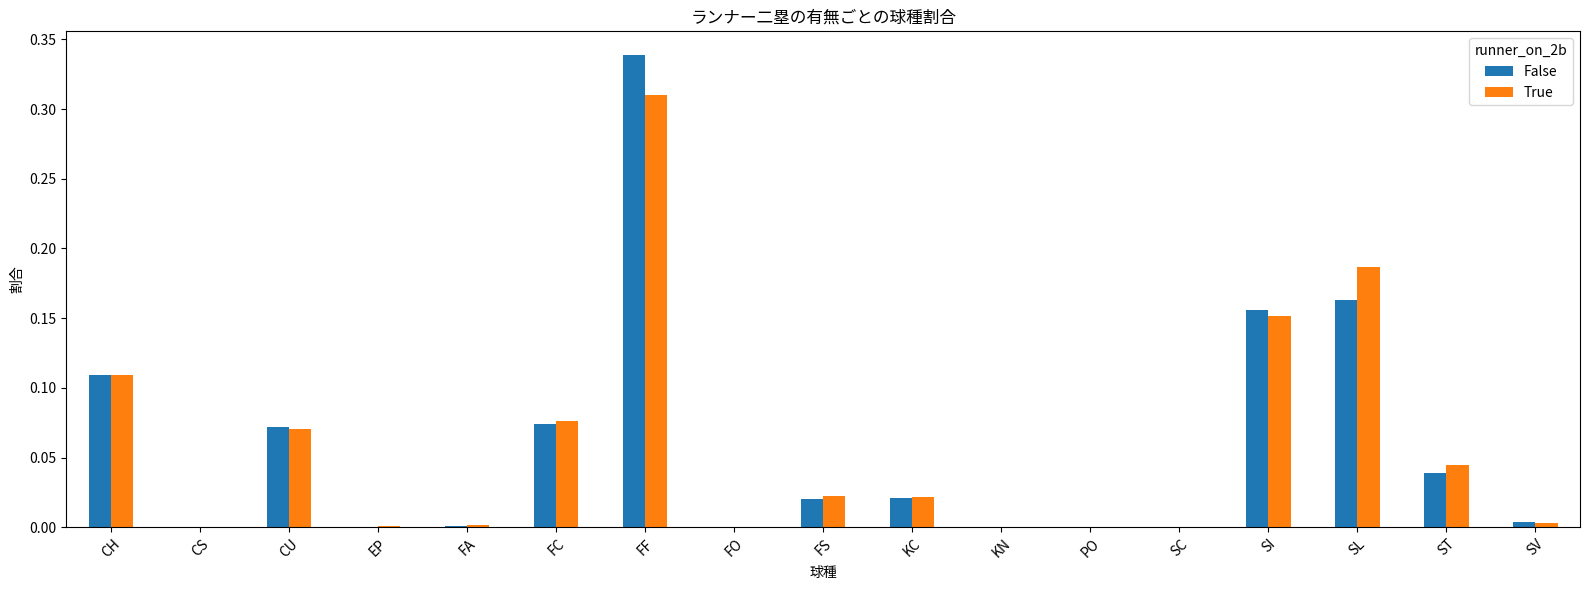

In [13]:
import pandas as pd
df_copy['runner_on_2b'] = df_copy['on_2b'].notnull()
# ランナー一塁の有無ごとに球種の比率を計算
runner_pitch_ratio = df_copy.groupby('runner_on_2b')['pitch_type'].value_counts(normalize=True).unstack().T

# 棒グラフで可視化
runner_pitch_ratio.plot(kind='bar', figsize=(16, 6))
plt.title('ランナー二塁の有無ごとの球種割合')
plt.xlabel('球種')
plt.ylabel('割合')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


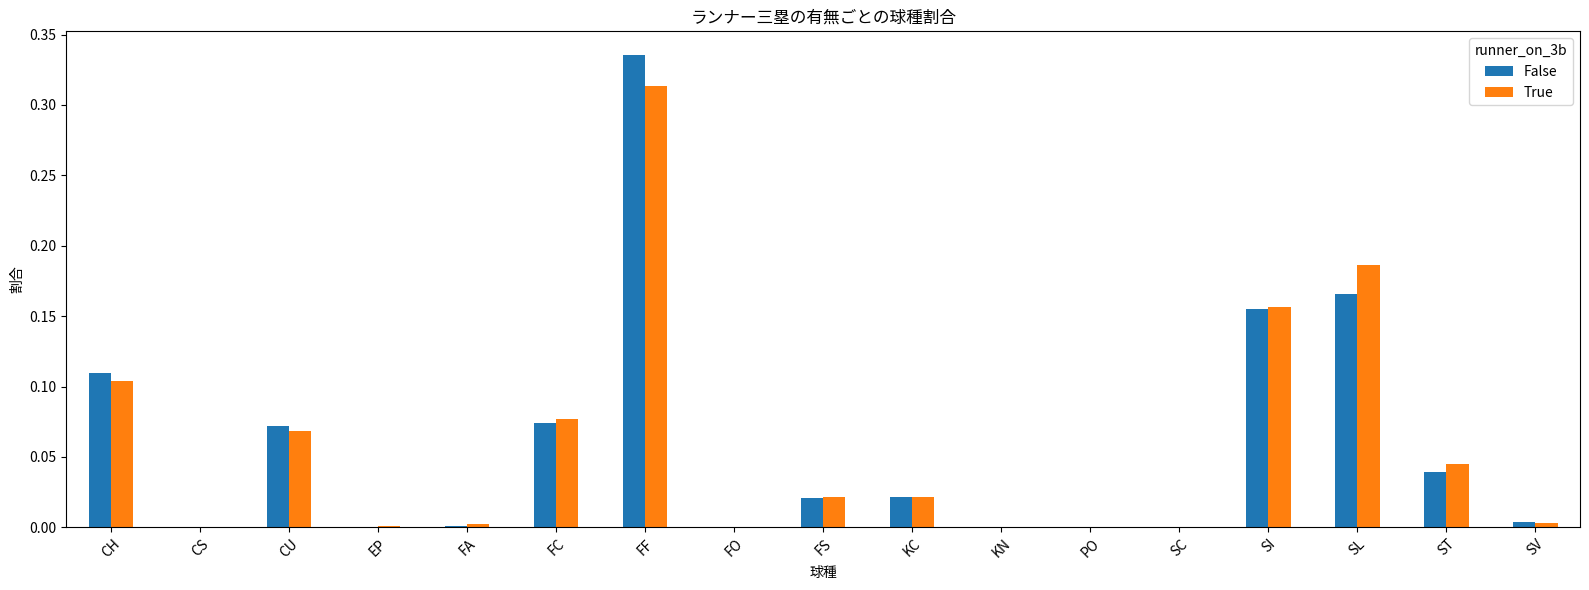

In [14]:
import pandas as pd
df_copy['runner_on_3b'] = df_copy['on_3b'].notnull()
# ランナー一塁の有無ごとに球種の比率を計算
runner_pitch_ratio = df_copy.groupby('runner_on_3b')['pitch_type'].value_counts(normalize=True).unstack().T

# 棒グラフで可視化
runner_pitch_ratio.plot(kind='bar', figsize=(16, 6))
plt.title('ランナー三塁の有無ごとの球種割合')
plt.xlabel('球種')
plt.ylabel('割合')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


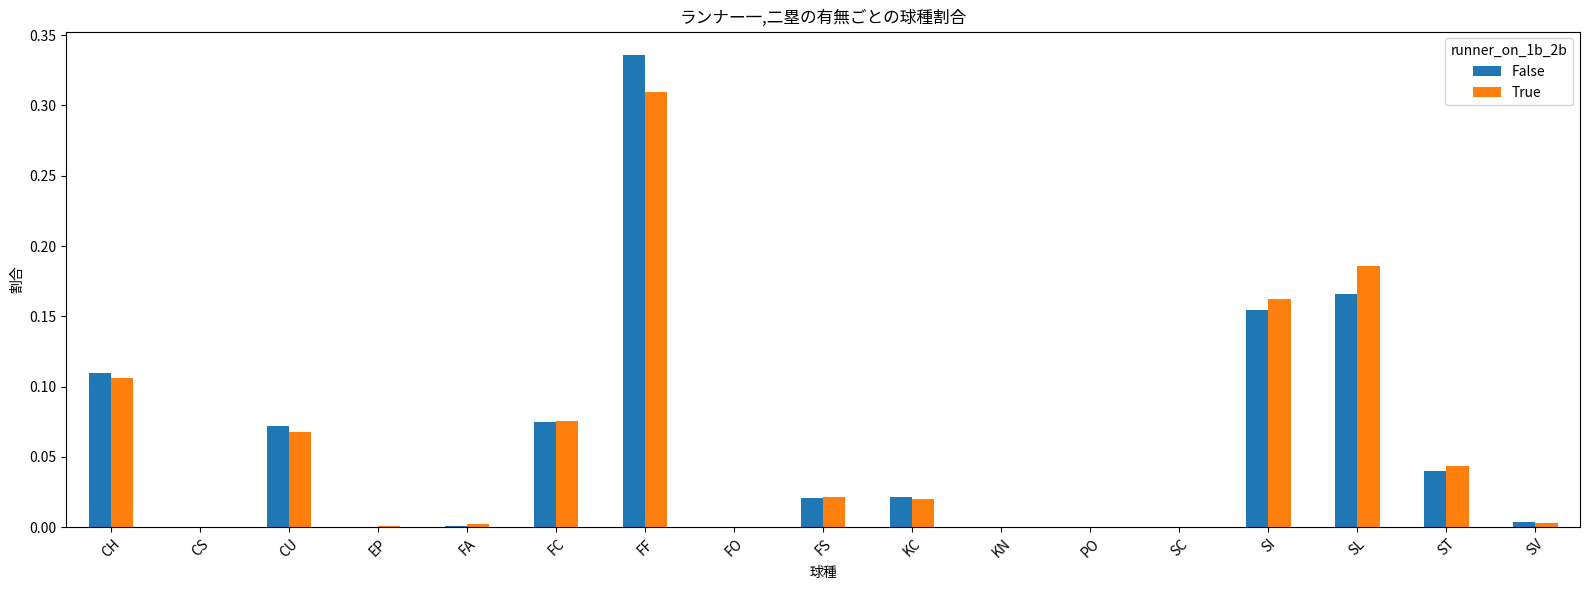

In [15]:
import pandas as pd
df_copy['runner_on_1b_2b'] = df_copy['on_1b'].notnull() & df_copy['on_2b'].notnull()
# ランナー一塁の有無ごとに球種の比率を計算
runner_pitch_ratio = df_copy.groupby('runner_on_1b_2b')['pitch_type'].value_counts(normalize=True).unstack().T

# 棒グラフで可視化
runner_pitch_ratio.plot(kind='bar', figsize=(16, 6))
plt.title('ランナー一,二塁の有無ごとの球種割合')
plt.xlabel('球種')
plt.ylabel('割合')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


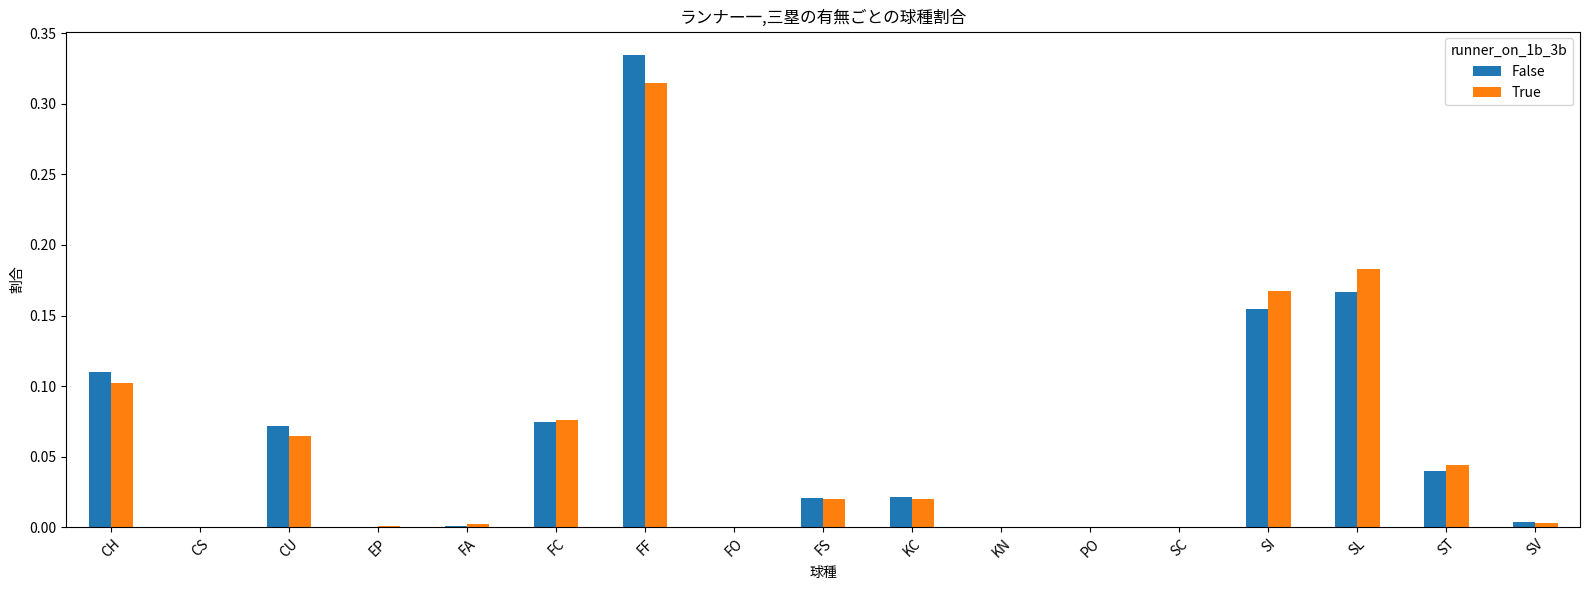

In [16]:
import pandas as pd
df_copy['runner_on_1b_3b'] = df_copy['on_1b'].notnull() & df_copy['on_3b'].notnull()
# ランナー一塁の有無ごとに球種の比率を計算
runner_pitch_ratio = df_copy.groupby('runner_on_1b_3b')['pitch_type'].value_counts(normalize=True).unstack().T

# 棒グラフで可視化
runner_pitch_ratio.plot(kind='bar', figsize=(16, 6))
plt.title('ランナー一,三塁の有無ごとの球種割合')
plt.xlabel('球種')
plt.ylabel('割合')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


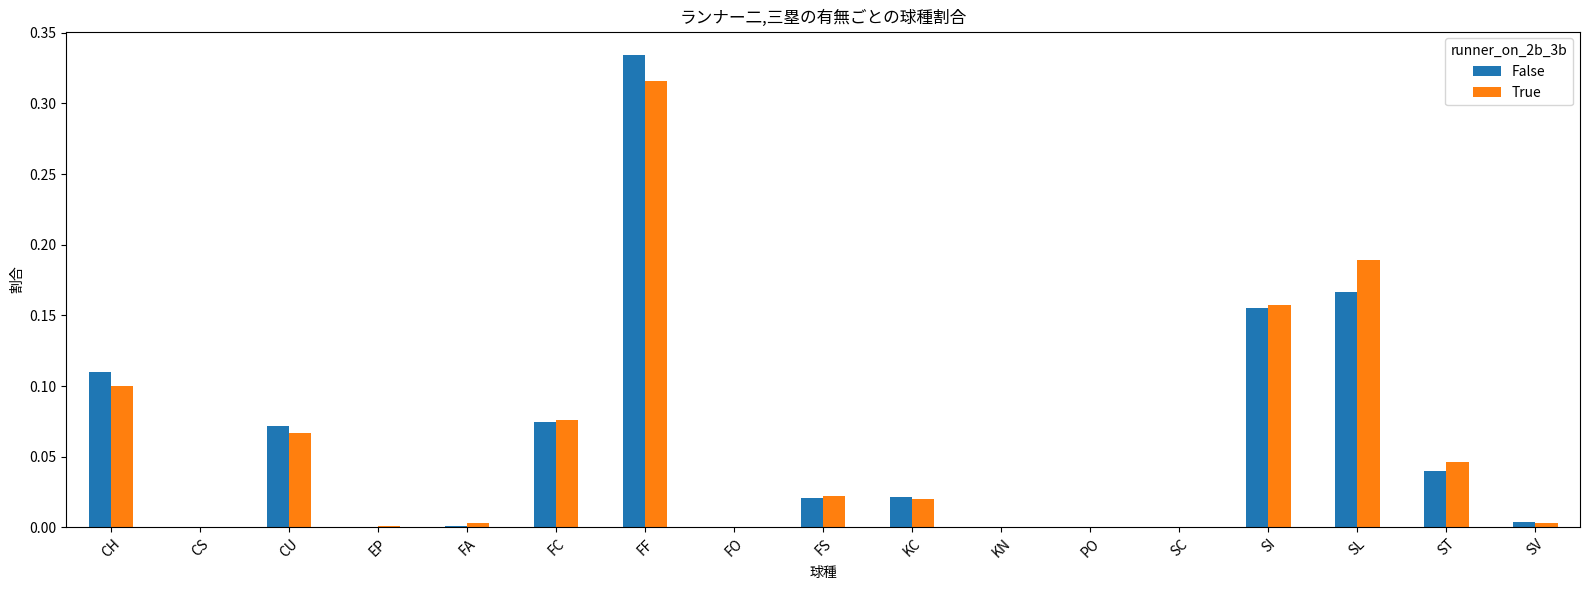

In [17]:
import pandas as pd
df_copy['runner_on_2b_3b'] = df_copy['on_2b'].notnull() & df_copy['on_3b'].notnull()
# ランナー一塁の有無ごとに球種の比率を計算
runner_pitch_ratio = df_copy.groupby('runner_on_2b_3b')['pitch_type'].value_counts(normalize=True).unstack().T

# 棒グラフで可視化
runner_pitch_ratio.plot(kind='bar', figsize=(16, 6))
plt.title('ランナー二,三塁の有無ごとの球種割合')
plt.xlabel('球種')
plt.ylabel('割合')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


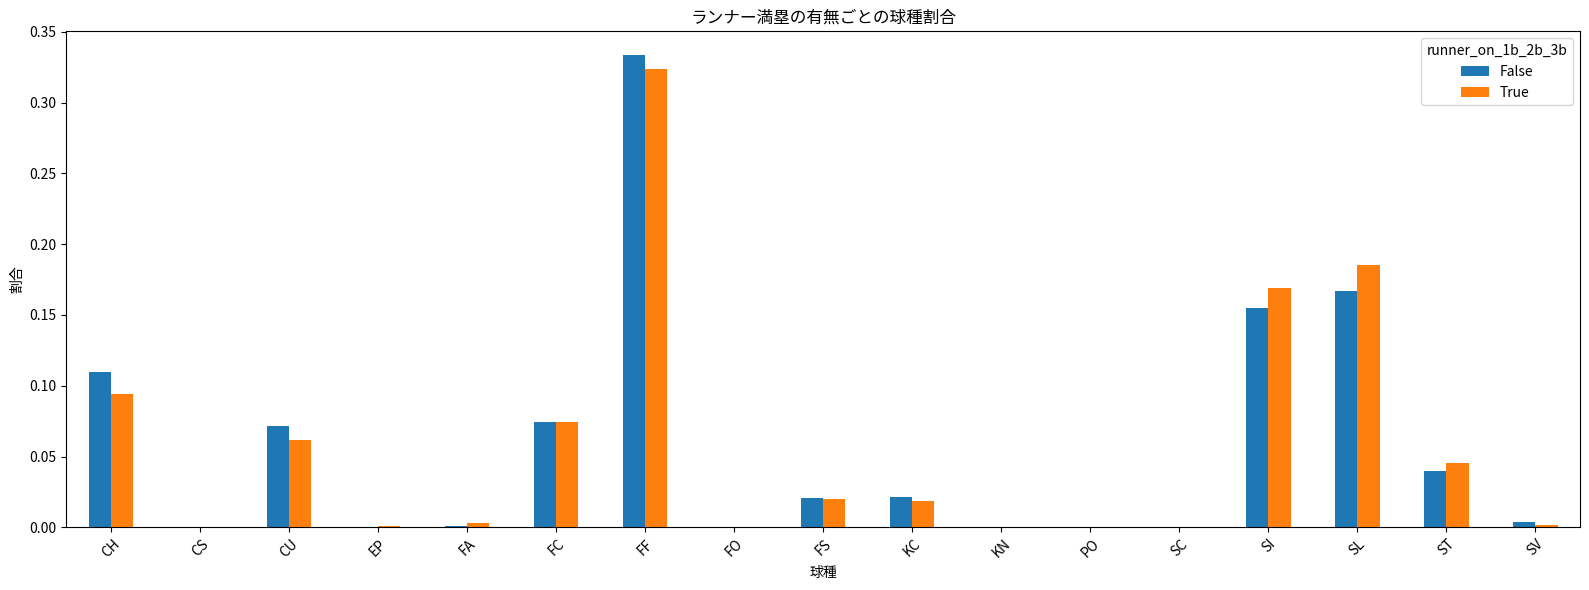

In [18]:
import pandas as pd
df_copy['runner_on_1b_2b_3b'] = df_copy['on_1b'].notnull() & df_copy['on_2b'].notnull() & df_copy['on_3b'].notnull()
# ランナー一塁の有無ごとに球種の比率を計算
runner_pitch_ratio = df_copy.groupby('runner_on_1b_2b_3b')['pitch_type'].value_counts(normalize=True).unstack().T

# 棒グラフで可視化
runner_pitch_ratio.plot(kind='bar', figsize=(16, 6))
plt.title('ランナー満塁の有無ごとの球種割合')
plt.xlabel('球種')
plt.ylabel('割合')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


runner_state         000       001       010       011       100       101       110       111
pitch_type_nan                                                                                
CH             -0.826850 -0.090337  0.325205 -0.094275  1.053842 -0.031841  0.099931 -0.435421
CS              0.021353 -0.000461  0.001457 -0.002794 -0.014220 -0.000903 -0.003524 -0.001181
CU              2.225378 -0.005826  0.226781  0.008406 -1.879385 -0.144804 -0.152788 -0.277690
EP             -0.076079 -0.002649 -0.002891  0.002976  0.022180  0.007871  0.030047  0.018275
FA             -0.185213 -0.001484  0.006369  0.019204  0.021904  0.013760  0.067782  0.057410
FC             -1.393335  0.096843  0.116761  0.046245  0.955242  0.103000  0.082118 -0.006787
FF              8.154567 -0.567262 -2.242335 -0.712422 -1.003175 -0.945385 -2.391803 -0.290854
FO              0.008403 -0.001435  0.001632 -0.000025 -0.018044  0.001807  0.003836  0.003553
FS             -0.234603  0.036755  0.245547  0.09

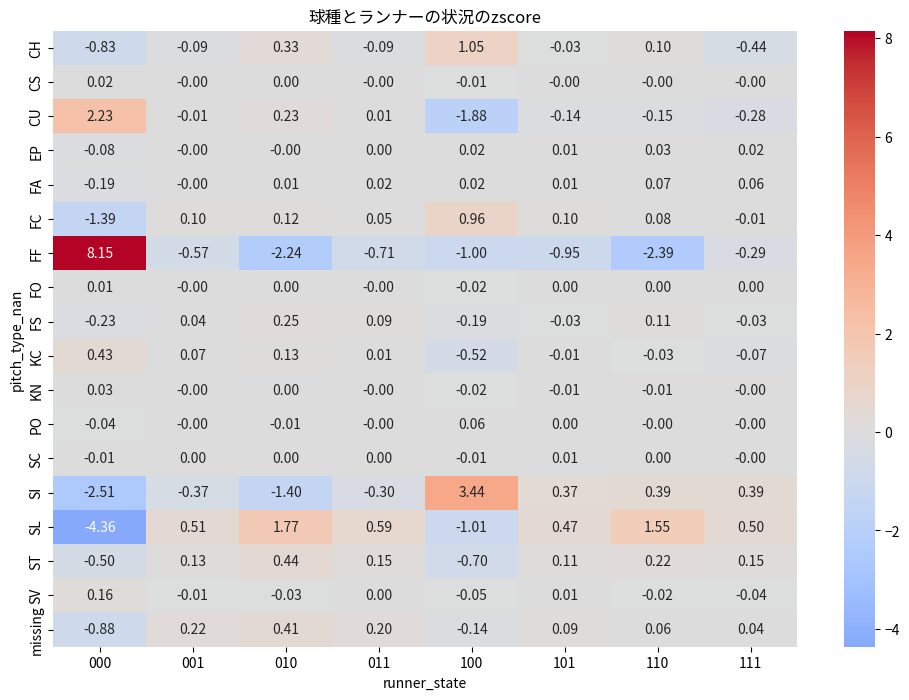

In [40]:
# 球種とランナー状況のZscore
import numpy as np
import seaborn as sns
# 塁状況ごとの球種割合
df_copy['runner_state'] = (
    df_copy['on_1b'].notnull().astype(int).astype(str) +
    df_copy['on_2b'].notnull().astype(int).astype(str) +
    df_copy['on_3b'].notnull().astype(int).astype(str)
)
# 例：'000' = ランナーなし, '010' = 二塁のみ, '111' = 満塁
df_copy['pitch_type_nan'] = df_copy['pitch_type'].fillna('missing')

pitch_ratio_by_runner = (
    df_copy.groupby('runner_state')['pitch_type_nan']
    .value_counts(normalize=False)
    .unstack().T
)
pitch_ratio_by_runner['total'] = pitch_ratio_by_runner.sum(axis=1)       
pitch_ratio_by_runner.loc['total'] = pitch_ratio_by_runner.sum(axis=0)

pitch_ratio_by_runner=pitch_ratio_by_runner/3345239
#print(pitch_ratio_by_runner)
#print(df_copy.shape)

# 行の 'total'（各球種の合計）と列の 'total'（各塁状況の合計）を取得
row_totals = pitch_ratio_by_runner['total'].drop('total')  # Series
col_totals = pitch_ratio_by_runner.loc['total'].drop('total')  # Series
pitch_ratio_by_runner = pitch_ratio_by_runner.fillna(0)

# outer product で新しい DataFrame 作成
expected_df = pd.DataFrame(
    np.outer(row_totals, col_totals),
    index=row_totals.index,
    columns=col_totals.index
)
#print(expected_df)

residual_df = pitch_ratio_by_runner - expected_df

#print(residual_df)

from scipy.stats import zscore
residual_core = residual_df.loc[row_totals.index, col_totals.index]

# flattenして全体のZスコアを計算 → 元の形に戻す
flattened = residual_core.values.flatten()
flattened_z = zscore(flattened)

# reshapeしてDataFrameに変換
zscore_overall_df = pd.DataFrame(
    flattened_z.reshape(residual_core.shape),
    index=residual_core.index,
    columns=residual_core.columns
)

# runner_stateの列名をつける（任意）
#df_converted.columns = ['000', '001', '010', '011', '100', '101', '110', '111']

# 結果確認
print(zscore_overall_df)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(zscore_overall_df, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("球種とランナーの状況のzscore")
plt.show()


In [20]:
# 投手ごとの通算球数をカウント（試合単位）
df_copy_pinum=df_copy.copy()
df_copy_pinum = df_copy_pinum.sort_values(by=['game_pk', 'pitcher', 'inning', 'inning_topbot', 'at_bat_number', 'pitch_number'])

# 新しい列 'pitch_count_total' を追加：試合内でのその投手の累積球数
df_copy_pinum['pitch_count_total'] = df_copy_pinum.groupby(['game_pk', 'pitcher']).cumcount() + 1
print(df_copy_pinum['pitch_count_total'])
# 10球ごとのラベルを作成
df_copy_pinum['pitch_count_bin'] = pd.cut(
    df_copy_pinum['pitch_count_total'],
    bins=range(0, df_copy_pinum['pitch_count_total'].max() + 10, 10),
    right=True,
    labels=[f"{i}〜{i+10}" for i in range(0, df_copy_pinum['pitch_count_total'].max(), 10)]
)
print(df_copy_pinum)

127824      1
127825      2
127826      3
127827      4
127828      5
           ..
3333511    13
3333512    14
3333513    15
3333514    16
3333515    17
Name: pitch_count_total, Length: 3345239, dtype: int64
        pitch_type   game_date  release_speed  release_pos_x  release_pos_z    player_name  batter  pitcher     events      description  zone                                                des game_type stand p_throws home_team away_team type  hit_location     bb_type  balls  strikes  game_year  pfx_x  pfx_z  plate_x  plate_z     on_3b     on_2b     on_1b  outs_when_up  inning inning_topbot    hc_x    hc_y       vx0         vy0       vz0         ax         ay         az  sz_top  sz_bot  hit_distance_sc  launch_speed  launch_angle  effective_speed  release_spin_rate  release_extension  game_pk  fielder_2  fielder_3  fielder_4  fielder_5  fielder_6  fielder_7  fielder_8  fielder_9  release_pos_y  estimated_ba_using_speedangle  estimated_woba_using_speedangle  woba_value  woba_denom 

/tmp/ipykernel_1356967/3712171597.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy_pinum.groupby('pitch_count_bin')['pitch_type_nan']


pitch_count_bin      0〜10     10〜20     20〜30     30〜40     40〜50     50〜60     60〜70     70〜80     80〜90    90〜100   100〜110   110〜120       120〜130       130〜140
pitch_type_nan                                                                                                                                                     
CH              -8.516844 -1.809403  0.147121  1.395384  2.289680  1.849191  1.522051  1.576943  1.105986  0.413069  0.030772 -0.003031 -8.880156e-04 -3.178144e-05
CS               0.002095 -0.004444 -0.000099 -0.001112  0.002278 -0.000212  0.002276 -0.002293  0.000786  0.000389  0.000376 -0.000037 -2.363599e-06 -4.220713e-08
CU              -5.549070 -1.889544  0.296685  1.116358  1.321758  1.305060  1.277673  1.054520  0.684126  0.316959  0.063555  0.001319  6.203352e-04 -2.077062e-05
EP               0.200612  0.028125 -0.029022 -0.038615 -0.036132 -0.033790 -0.031433 -0.027669 -0.020253 -0.009732 -0.001941 -0.000140 -8.902062e-06 -1.589654e-07
FA              

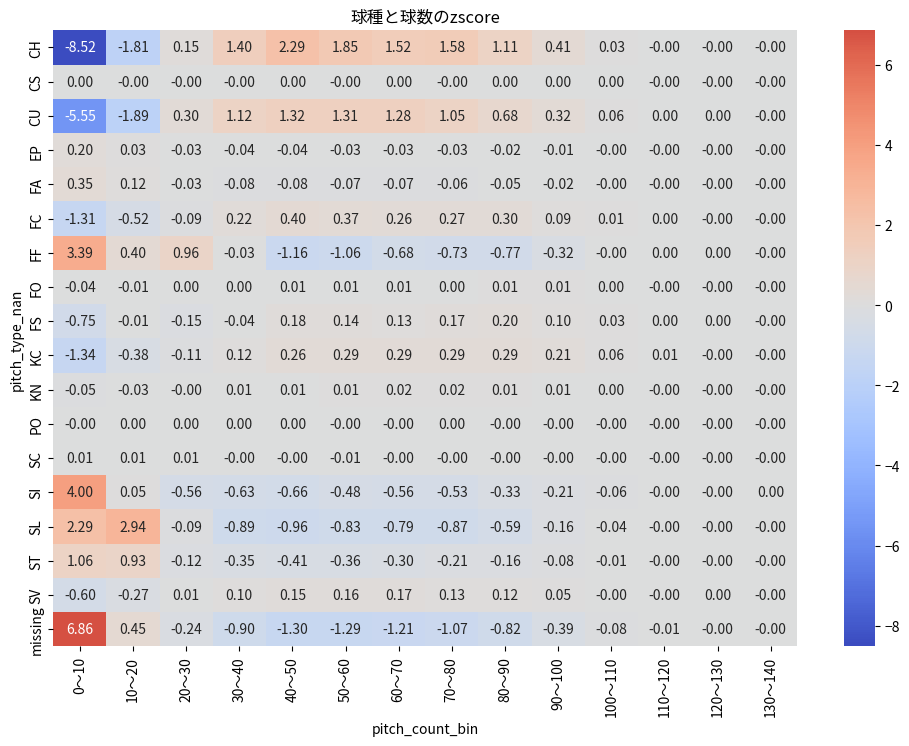

In [42]:
# 球種と球数のZscore
import numpy as np
import seaborn as sns
from scipy.stats import zscore
df_copy_pinum['pitch_type_nan'] = df_copy_pinum['pitch_type'].fillna('missing')

pitch_ratio_by_runner = (
    df_copy_pinum.groupby('pitch_count_bin')['pitch_type_nan']
    .value_counts(normalize=False)
    .unstack().T
)
pitch_ratio_by_runner['total'] = pitch_ratio_by_runner.sum(axis=1)       
pitch_ratio_by_runner.loc['total'] = pitch_ratio_by_runner.sum(axis=0)

pitch_ratio_by_runner=pitch_ratio_by_runner/3345239
#print(pitch_ratio_by_runner)
#print(df_copy.shape)

# 行の 'total'（各球種の合計）と列の 'total'（各塁状況の合計）を取得
row_totals = pitch_ratio_by_runner['total'].drop('total')  # Series
col_totals = pitch_ratio_by_runner.loc['total'].drop('total')  # Series

# outer product で新しい DataFrame 作成
expected_df = pd.DataFrame(
    np.outer(row_totals, col_totals),
    index=row_totals.index,
    columns=col_totals.index
)
#print(expected_df)

residual_df = pitch_ratio_by_runner - expected_df

#print(residual_df)

from scipy.stats import zscore
residual_core = residual_df.loc[row_totals.index, col_totals.index]

# flattenして全体のZスコアを計算 → 元の形に戻す
flattened = residual_core.values.flatten()
flattened_z = zscore(flattened)

# reshapeしてDataFrameに変換
zscore_overall_df = pd.DataFrame(
    flattened_z.reshape(residual_core.shape),
    index=residual_core.index,
    columns=residual_core.columns
)

# runner_stateの列名をつける（任意）
#df_converted.columns = ['000', '001', '010', '011', '100', '101', '110', '111']

# 結果確認
print(zscore_overall_df)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(zscore_overall_df, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("球種と球数のzscore")
plt.show()


In [22]:
df_copy["count"].value_counts()
df_copy[['balls', 'strikes']] = df_copy['count'].str.split('-', expand=True).astype('float')
# 条件：ボールが0〜3、ストライクが0〜2の範囲内だけ残す
df_copy = df_copy[
    (df_copy['balls'] <= 3) &
    (df_copy['strikes'] <= 2)
]
df_copy = df_copy.drop(columns=['balls', 'strikes'])
df_copy["count"].value_counts()


count
0-0    874786
0-1    432456
1-1    331769
1-0    326665
1-2    319405
2-2    272136
0-2    231281
2-1    171392
3-2    164403
2-0    112553
3-1     71426
3-0     36954
Name: count, dtype: int64

count                0-0       0-1       0-2       1-0       1-1       1-2       2-0       2-1       2-2       3-0       3-1       3-2
pitch_type_nan                                                                                                                        
CH             -6.824198  2.060453  0.023314  0.991188  2.698887  1.056390 -0.386357  0.740879  1.170702 -0.694956 -0.558590 -0.277579
CS              0.008140  0.002105  0.005616 -0.006285 -0.003232  0.006313 -0.002007 -0.004276 -0.000740 -0.000861 -0.001639 -0.003279
CU              2.334038  0.236540  0.882976 -1.140468 -0.146672  1.228385 -1.015681 -0.794521  0.413135 -0.491720 -0.731313 -0.774662
EP              0.038996 -0.003664 -0.016538  0.018836  0.000902 -0.021960  0.008744 -0.000344 -0.018307  0.003433  0.001747 -0.011988
FA              0.047847 -0.013750 -0.029346  0.035685 -0.003336 -0.035491  0.019253  0.004675 -0.028737  0.006347  0.006918 -0.010206
FC              0.467471  0.248718 -1.169400  0.900826 

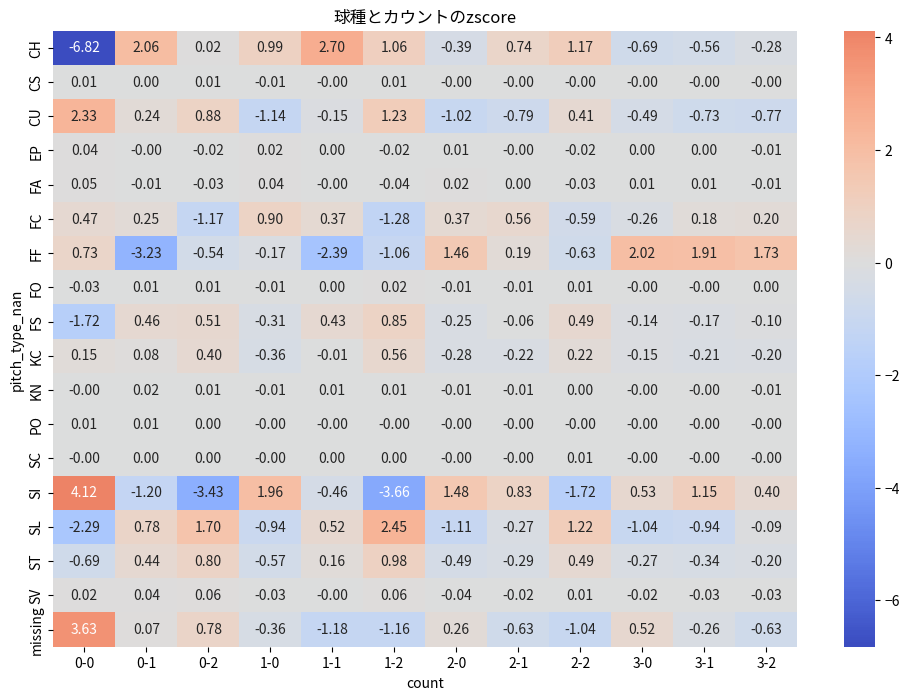

In [55]:
# 球種とカウントのZscore
import numpy as np
import seaborn as sns
from scipy.stats import zscore
df_copy['pitch_type_nan'] = df_copy['pitch_type'].fillna('missing')
df_copy["count"]
pitch_ratio_by_runner = (
    df_copy.groupby('count')['pitch_type_nan']
    .value_counts(normalize=False)
    .unstack().T
)
pitch_ratio_by_runner['total'] = pitch_ratio_by_runner.sum(axis=1)       
pitch_ratio_by_runner.loc['total'] = pitch_ratio_by_runner.sum(axis=0)

pitch_ratio_by_runner=pitch_ratio_by_runner/3345239
#print(pitch_ratio_by_runner)
#print(df_copy.shape)

# 行の 'total'（各球種の合計）と列の 'total'（各塁状況の合計）を取得
row_totals = pitch_ratio_by_runner['total'].drop('total')  # Series
col_totals = pitch_ratio_by_runner.loc['total'].drop('total')  # Series
pitch_ratio_by_runner = pitch_ratio_by_runner.fillna(0)

# outer product で新しい DataFrame 作成
expected_df = pd.DataFrame(
    np.outer(row_totals, col_totals),
    index=row_totals.index,
    columns=col_totals.index
)
#print(expected_df)

residual_df = pitch_ratio_by_runner - expected_df

#print(residual_df)

from scipy.stats import zscore
residual_core = residual_df.loc[row_totals.index, col_totals.index]

# flattenして全体のZスコアを計算 → 元の形に戻す
flattened = residual_core.values.flatten()
flattened_z = zscore(flattened)

# reshapeしてDataFrameに変換
zscore_overall_df = pd.DataFrame(
    flattened_z.reshape(residual_core.shape),
    index=residual_core.index,
    columns=residual_core.columns
)

# runner_stateの列名をつける（任意）
#df_converted.columns = ['000', '001', '010', '011', '100', '101', '110', '111']

# 結果確認
print(zscore_overall_df)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(zscore_overall_df, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("球種とカウントのzscore")
plt.show()


In [24]:
df_copy['pit-bat-lr'] = df_copy['p_throws'].astype(str) + '-' + df_copy['stand'].astype(str)
df_copy["pit-bat-lr"].value_counts()

pit-bat-lr
R-R    1292148
R-L    1132301
L-R     663129
L-L     257648
Name: count, dtype: int64

pit-bat-lr           L-L       L-R       R-L       R-R
pitch_type_nan                                        
CH             -0.937412  2.396898  2.260908 -3.720359
CS             -0.001399 -0.001116  0.004603 -0.002125
CU             -0.066114  0.313705  0.707298 -0.954880
EP             -0.004390 -0.012746  0.004876  0.012222
FA             -0.009995 -0.034082  0.010582  0.033457
FC             -0.157217 -0.126887  0.430310 -0.146195
FF             -0.164604  0.311763  1.651875 -1.798850
FO             -0.003702 -0.006130  0.006003  0.003792
FS             -0.244872 -0.520300  0.924185 -0.159038
KC             -0.109214 -0.136077  0.361246 -0.115979
KN             -0.005171 -0.013295  0.014213  0.004215
PO             -0.000642 -0.001675  0.000861  0.001417
SC             -0.001213 -0.003108  0.005103 -0.000819
SI              0.725871 -0.262146 -2.562127  2.098468
SL              0.649242 -1.372295 -2.847187  3.570313
ST              0.218187 -0.503967 -0.883041  1.168809
SV        

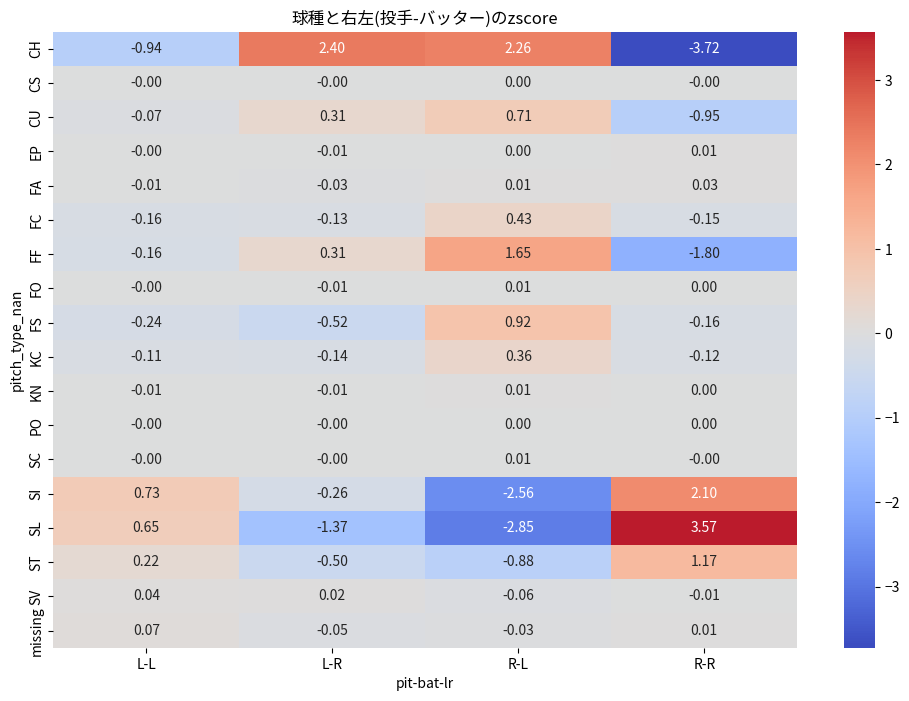

In [46]:
# 球種と左右(投手-バッター)のZscore
import numpy as np
import seaborn as sns
from scipy.stats import zscore
df_copy['pitch_type_nan'] = df_copy['pitch_type'].fillna('missing')
df_copy["count"]
pitch_ratio_by_runner = (
    df_copy.groupby('pit-bat-lr')['pitch_type_nan']
    .value_counts(normalize=False)
    .unstack().T
)
pitch_ratio_by_runner['total'] = pitch_ratio_by_runner.sum(axis=1)       
pitch_ratio_by_runner.loc['total'] = pitch_ratio_by_runner.sum(axis=0)

pitch_ratio_by_runner=pitch_ratio_by_runner/3345239
#print(pitch_ratio_by_runner)
#print(df_copy.shape)

# 行の 'total'（各球種の合計）と列の 'total'（各塁状況の合計）を取得
row_totals = pitch_ratio_by_runner['total'].drop('total')  # Series
col_totals = pitch_ratio_by_runner.loc['total'].drop('total')  # Series
pitch_ratio_by_runner = pitch_ratio_by_runner.fillna(0)

# outer product で新しい DataFrame 作成
expected_df = pd.DataFrame(
    np.outer(row_totals, col_totals),
    index=row_totals.index,
    columns=col_totals.index
)
#print(expected_df)

residual_df = pitch_ratio_by_runner - expected_df

#print(residual_df)

from scipy.stats import zscore
residual_core = residual_df.loc[row_totals.index, col_totals.index]

# flattenして全体のZスコアを計算 → 元の形に戻す
flattened = residual_core.values.flatten()
flattened_z = zscore(flattened)

# reshapeしてDataFrameに変換
zscore_overall_df = pd.DataFrame(
    flattened_z.reshape(residual_core.shape),
    index=residual_core.index,
    columns=residual_core.columns
)

# runner_stateの列名をつける（任意）
#df_converted.columns = ['000', '001', '010', '011', '100', '101', '110', '111']

# 結果確認
print(zscore_overall_df)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(zscore_overall_df, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("球種と右左(投手-バッター)のzscore")
plt.show()


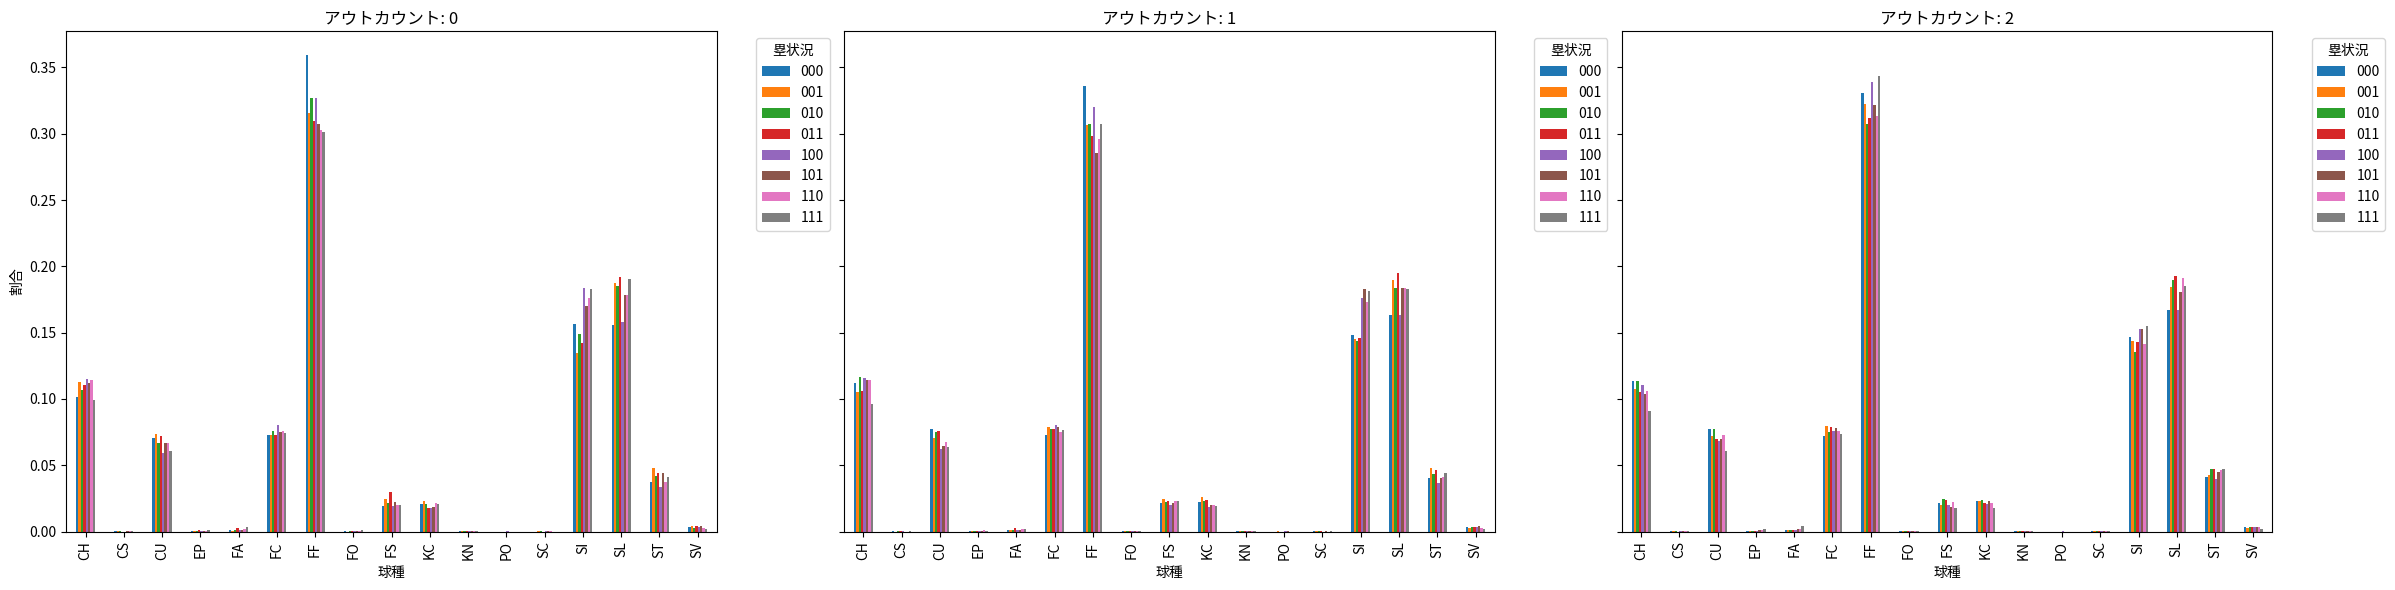

In [26]:
import matplotlib.pyplot as plt

# ランナー状況（000など）の列作成
df_copy['runner_state'] = df_copy[['on_1b', 'on_2b', 'on_3b']].notnull().astype(int).astype(str).agg(''.join, axis=1)

# figure作成
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)

# アウトカウントごとに処理
for i, out in enumerate([0, 1, 2]):
    subset = df_copy[df_copy['outs_when_up'] == out]
    ratio = subset.groupby('runner_state')['pitch_type'].value_counts(normalize=True).unstack().T
    ratio.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'アウトカウント: {out}')
    axes[i].set_xlabel('球種')
    axes[i].set_ylabel('割合')
    axes[i].legend(title='塁状況', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [27]:
df_copy["zone"].value_counts()

zone
14.0    616096
13.0    415448
11.0    362081
12.0    275436
5.0     241479
8.0     206769
6.0     196167
4.0     193592
9.0     183002
2.0     164096
7.0     156587
1.0     136729
3.0     122466
Name: count, dtype: int64

runner_state       000       001       010       011       100       101       110       111
zone                                                                                        
1.0           0.788198 -0.392253 -0.427269 -0.470025  0.315389 -0.380924 -0.527200 -0.484337
2.0           1.630907 -0.460044 -0.425417 -0.463647  0.030410 -0.415721 -0.647713 -0.450937
3.0           1.251420 -0.324350 -0.348476 -0.426176 -0.445382 -0.385017 -0.639258 -0.457277
4.0           0.998623 -0.597099 -0.530865 -0.572368  1.079245 -0.360787 -0.370028 -0.443351
5.0           2.741493 -0.663279 -0.653066 -0.629257  0.432531 -0.506810 -0.523138 -0.336723
6.0           2.903895 -0.505178 -0.744374 -0.506325 -0.408660 -0.569876 -0.488358 -0.442353
7.0           0.031826 -0.557991 -0.357515 -0.438261  0.899301 -0.373600 -0.091335 -0.417825
8.0           1.497099 -0.582119 -0.481096 -0.532762  0.470594 -0.475420 -0.152294 -0.359468
9.0           2.083060 -0.512384 -0.504540 -0.477042 -0.403672 -0.5562

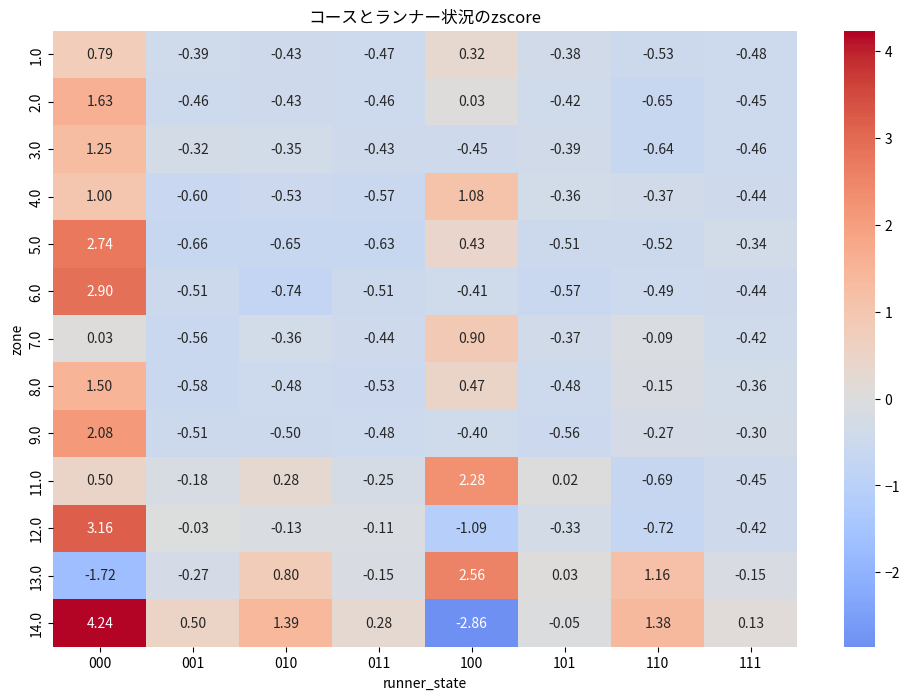

In [47]:
# 球種とランナー状況のZscore
import numpy as np
import seaborn as sns
# 塁状況ごとの球種割合
df_copy['runner_state'] = (
    df_copy['on_1b'].notnull().astype(int).astype(str) +
    df_copy['on_2b'].notnull().astype(int).astype(str) +
    df_copy['on_3b'].notnull().astype(int).astype(str)
)
# 例：'000' = ランナーなし, '010' = 二塁のみ, '111' = 満塁
#df_copy['pitch_type_nan'] = df_copy['pitch_type'].fillna('missing')

pitch_ratio_by_runner = (
    df_copy.groupby('runner_state')['zone']
    .value_counts(normalize=False)
    .unstack().T
)
pitch_ratio_by_runner['total'] = pitch_ratio_by_runner.sum(axis=1)       
pitch_ratio_by_runner.loc['total'] = pitch_ratio_by_runner.sum(axis=0)

pitch_ratio_by_runner=pitch_ratio_by_runner/3345239
#print(pitch_ratio_by_runner)
#print(df_copy.shape)

# 行の 'total'（各球種の合計）と列の 'total'（各塁状況の合計）を取得
row_totals = pitch_ratio_by_runner['total'].drop('total')  # Series
col_totals = pitch_ratio_by_runner.loc['total'].drop('total')  # Series

# outer product で新しい DataFrame 作成
expected_df = pd.DataFrame(
    np.outer(row_totals, col_totals),
    index=row_totals.index,
    columns=col_totals.index
)
#print(expected_df)

residual_df = pitch_ratio_by_runner - expected_df

#print(residual_df)

from scipy.stats import zscore
residual_core = residual_df.loc[row_totals.index, col_totals.index]

# flattenして全体のZスコアを計算 → 元の形に戻す
flattened = residual_core.values.flatten()
flattened_z = zscore(flattened)

# reshapeしてDataFrameに変換
zscore_overall_df = pd.DataFrame(
    flattened_z.reshape(residual_core.shape),
    index=residual_core.index,
    columns=residual_core.columns
)

# runner_stateの列名をつける（任意）
#df_converted.columns = ['000', '001', '010', '011', '100', '101', '110', '111']

# 結果確認
print(zscore_overall_df)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(zscore_overall_df, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("コースとランナー状況のzscore")
plt.show()

/tmp/ipykernel_1356967/987526470.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy_pinum.groupby('pitch_count_bin')['zone']


pitch_count_bin      0〜10     10〜20     20〜30     30〜40     40〜50     50〜60     60〜70     70〜80     80〜90    90〜100   100〜110   110〜120   120〜130   130〜140
zone                                                                                                                                                       
1.0              1.473734 -0.520615  0.366278 -0.005742 -0.472906 -0.186911 -0.163936 -0.556012 -0.600386 -0.439919 -0.446117 -0.451935 -0.455638 -0.456487
2.0              1.534609 -0.607215  0.609575  0.280593 -0.415686 -0.461855 -0.127327 -0.293734 -0.456415 -0.465252 -0.457230 -0.451040 -0.453897 -0.456496
3.0              0.485984 -0.875548  0.502019  0.310301 -0.330423 -0.185567 -0.258402 -0.348319 -0.312926 -0.441245 -0.450589 -0.461242 -0.456497 -0.456482
4.0              2.118202 -0.045549  0.135103 -0.043615 -0.239916 -0.351246 -0.092857 -0.405934 -0.361291 -0.367494 -0.451155 -0.451907 -0.457841 -0.456506
5.0              3.099575 -0.137495  0.509697  0.491477 -0.56753

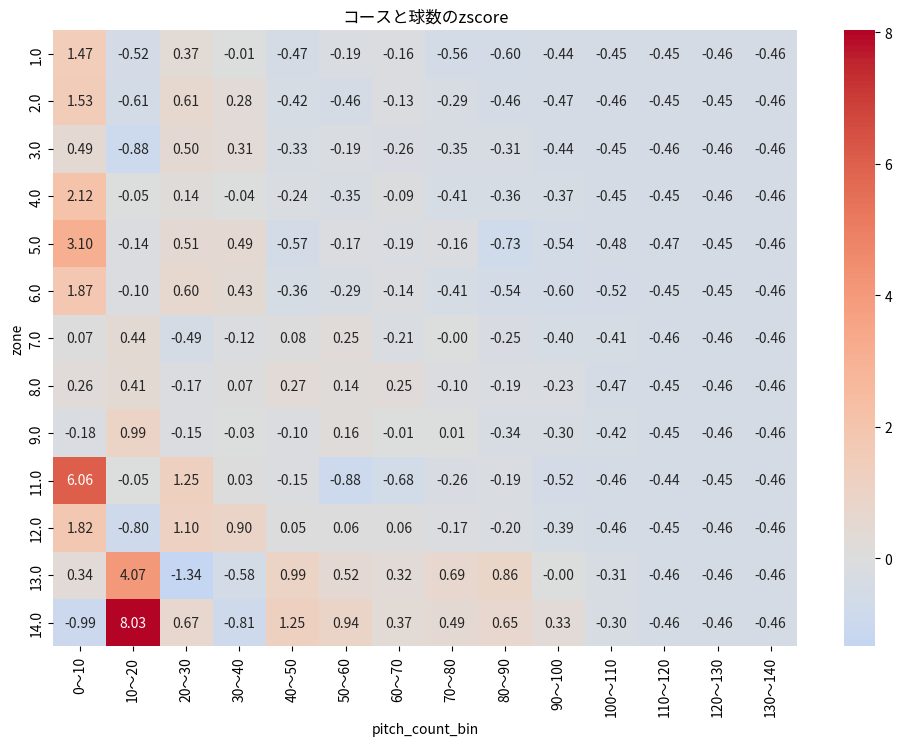

In [50]:
# 球種と球数のZscore
import numpy as np
import seaborn as sns
from scipy.stats import zscore
df_copy_pinum['pitch_type_nan'] = df_copy_pinum['pitch_type'].fillna('missing')

pitch_ratio_by_runner = (
    df_copy_pinum.groupby('pitch_count_bin')['zone']
    .value_counts(normalize=False)
    .unstack().T
)
pitch_ratio_by_runner['total'] = pitch_ratio_by_runner.sum(axis=1)       
pitch_ratio_by_runner.loc['total'] = pitch_ratio_by_runner.sum(axis=0)

pitch_ratio_by_runner=pitch_ratio_by_runner/3345239
#print(pitch_ratio_by_runner)
#print(df_copy.shape)

# 行の 'total'（各球種の合計）と列の 'total'（各塁状況の合計）を取得
row_totals = pitch_ratio_by_runner['total'].drop('total')  # Series
col_totals = pitch_ratio_by_runner.loc['total'].drop('total')  # Series

# outer product で新しい DataFrame 作成
expected_df = pd.DataFrame(
    np.outer(row_totals, col_totals),
    index=row_totals.index,
    columns=col_totals.index
)
#print(expected_df)

residual_df = pitch_ratio_by_runner - expected_df

#print(residual_df)

from scipy.stats import zscore
residual_core = residual_df.loc[row_totals.index, col_totals.index]

# flattenして全体のZスコアを計算 → 元の形に戻す
flattened = residual_core.values.flatten()
flattened_z = zscore(flattened)

# reshapeしてDataFrameに変換
zscore_overall_df = pd.DataFrame(
    flattened_z.reshape(residual_core.shape),
    index=residual_core.index,
    columns=residual_core.columns
)

# runner_stateの列名をつける（任意）
#df_converted.columns = ['000', '001', '010', '011', '100', '101', '110', '111']

# 結果確認
print(zscore_overall_df)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(zscore_overall_df, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("コースと球数のzscore")
plt.show()

count       0-0       0-1       0-2       1-0       1-1       1-2       2-0       2-1       2-2       3-0       3-1       3-2
zone                                                                                                                         
1.0    0.848784 -0.455867 -0.643854  0.155324 -0.170292 -0.684453  0.129351  0.066055 -0.232183  0.075246  0.084812  0.194327
2.0    0.899786 -0.568619 -0.614691  0.107860 -0.181856 -0.596265  0.104253  0.071840 -0.165525  0.070494  0.116493  0.274312
3.0    0.517790 -0.142937 -0.345725 -0.032491 -0.143158 -0.312228  0.000931 -0.060362 -0.101078 -0.041559 -0.044453 -0.006090
4.0    1.464146 -0.613005 -1.468424  0.641656  0.086690 -1.419622  0.293866  0.376959 -0.425441  0.069331  0.241657  0.432837
5.0    2.035095 -1.147911 -1.792642  0.908714 -0.157362 -1.870147  0.466644  0.541422 -0.395190  0.142268  0.426116  0.787572
6.0    1.470949 -0.539082 -1.193680  0.473384 -0.040443 -1.171023  0.184970  0.262505 -0.269396  0.012318  0.159200  0

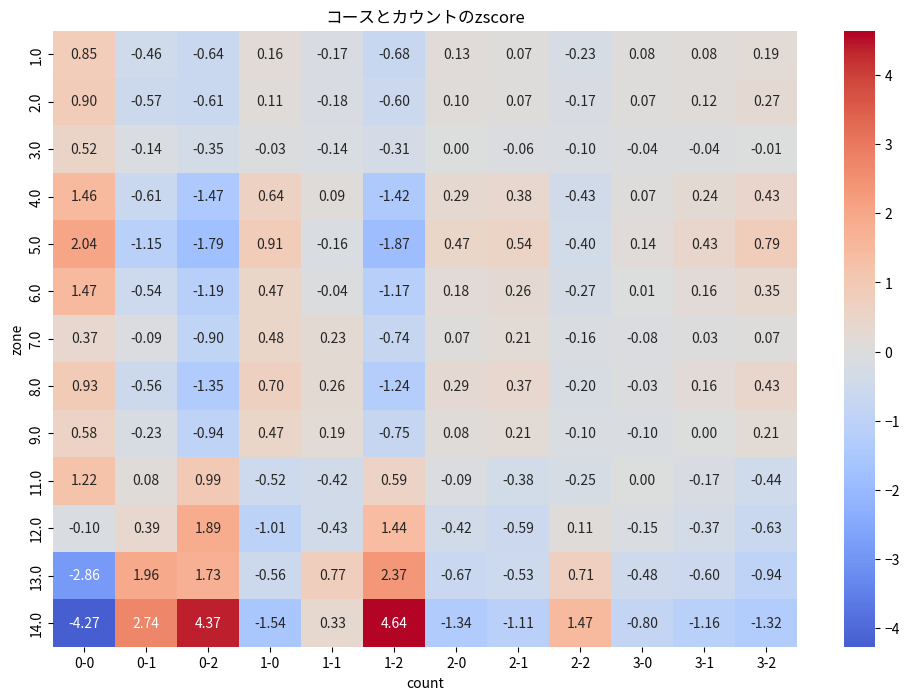

In [51]:
# 球種とカウントのZscore
import numpy as np
import seaborn as sns
from scipy.stats import zscore
df_copy['pitch_type_nan'] = df_copy['pitch_type'].fillna('missing')
df_copy["count"]
pitch_ratio_by_runner = (
    df_copy.groupby('count')['zone']
    .value_counts(normalize=False)
    .unstack().T
)
pitch_ratio_by_runner['total'] = pitch_ratio_by_runner.sum(axis=1)       
pitch_ratio_by_runner.loc['total'] = pitch_ratio_by_runner.sum(axis=0)

pitch_ratio_by_runner=pitch_ratio_by_runner/3345239
#print(pitch_ratio_by_runner)
#print(df_copy.shape)

# 行の 'total'（各球種の合計）と列の 'total'（各塁状況の合計）を取得
row_totals = pitch_ratio_by_runner['total'].drop('total')  # Series
col_totals = pitch_ratio_by_runner.loc['total'].drop('total')  # Series

# outer product で新しい DataFrame 作成
expected_df = pd.DataFrame(
    np.outer(row_totals, col_totals),
    index=row_totals.index,
    columns=col_totals.index
)
#print(expected_df)

residual_df = pitch_ratio_by_runner - expected_df

#print(residual_df)

from scipy.stats import zscore
residual_core = residual_df.loc[row_totals.index, col_totals.index]

# flattenして全体のZスコアを計算 → 元の形に戻す
flattened = residual_core.values.flatten()
flattened_z = zscore(flattened)

# reshapeしてDataFrameに変換
zscore_overall_df = pd.DataFrame(
    flattened_z.reshape(residual_core.shape),
    index=residual_core.index,
    columns=residual_core.columns
)

# runner_stateの列名をつける（任意）
#df_converted.columns = ['000', '001', '010', '011', '100', '101', '110', '111']

# 結果確認
print(zscore_overall_df)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(zscore_overall_df, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("コースとカウントのzscore")
plt.show()

pit-bat-lr       L-L       L-R       R-L       R-R
zone                                              
1.0        -0.086095 -0.187440  0.378809 -0.214939
2.0        -0.030575 -0.015336 -0.017369 -0.020243
3.0        -0.026558  0.163953 -0.294031  0.033346
4.0         0.095934 -0.167115  0.476418 -0.460586
5.0         0.031590 -0.090290 -0.092030  0.141125
6.0        -0.109304  0.072051 -0.599196  0.583560
7.0         0.206468  0.032219  0.349699 -0.679083
8.0        -0.026871 -0.023266  0.102671 -0.095296
9.0        -0.256932 -0.138487 -0.480521  0.810477
11.0       -0.454913 -1.090461  2.301608 -0.650637
12.0        0.070840  1.489891 -1.111698 -0.426201
13.0        1.363905  1.326052  0.481553 -3.014936
14.0       -1.319145 -1.532418 -1.218962  4.418764


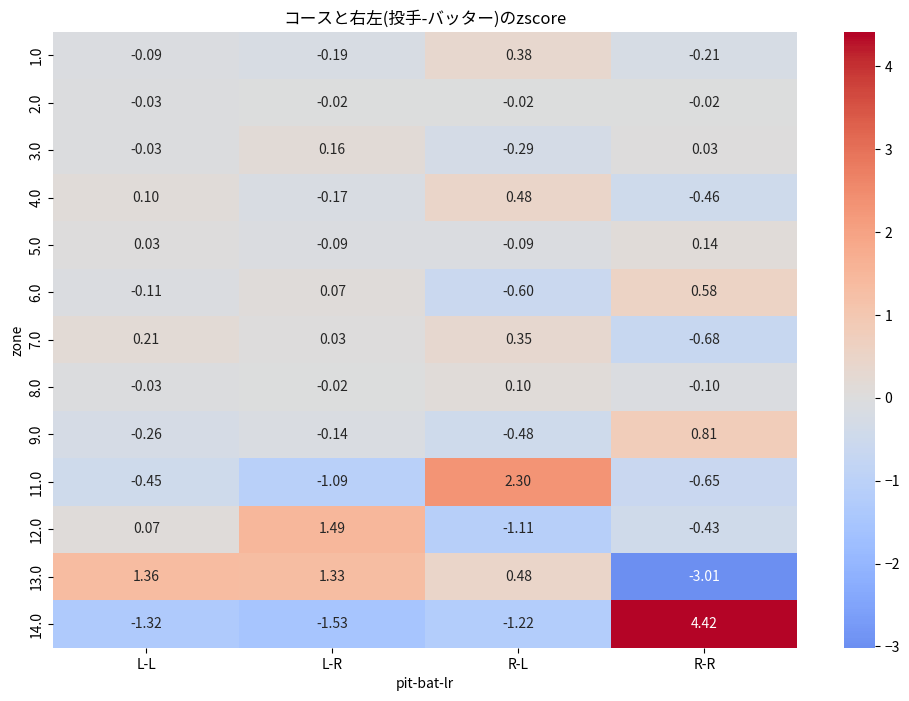

In [52]:
# 球種とカウントのZscore
import numpy as np
import seaborn as sns
from scipy.stats import zscore
df_copy['pitch_type_nan'] = df_copy['pitch_type'].fillna('missing')
df_copy["count"]
pitch_ratio_by_runner = (
    df_copy.groupby('pit-bat-lr')['zone']
    .value_counts(normalize=False)
    .unstack().T
)
pitch_ratio_by_runner['total'] = pitch_ratio_by_runner.sum(axis=1)       
pitch_ratio_by_runner.loc['total'] = pitch_ratio_by_runner.sum(axis=0)

pitch_ratio_by_runner=pitch_ratio_by_runner/3345239
#print(pitch_ratio_by_runner)
#print(df_copy.shape)

# 行の 'total'（各球種の合計）と列の 'total'（各塁状況の合計）を取得
row_totals = pitch_ratio_by_runner['total'].drop('total')  # Series
col_totals = pitch_ratio_by_runner.loc['total'].drop('total')  # Series

# outer product で新しい DataFrame 作成
expected_df = pd.DataFrame(
    np.outer(row_totals, col_totals),
    index=row_totals.index,
    columns=col_totals.index
)
#print(expected_df)

residual_df = pitch_ratio_by_runner - expected_df

#print(residual_df)

from scipy.stats import zscore
residual_core = residual_df.loc[row_totals.index, col_totals.index]

# flattenして全体のZスコアを計算 → 元の形に戻す
flattened = residual_core.values.flatten()
flattened_z = zscore(flattened)

# reshapeしてDataFrameに変換
zscore_overall_df = pd.DataFrame(
    flattened_z.reshape(residual_core.shape),
    index=residual_core.index,
    columns=residual_core.columns
)

# runner_stateの列名をつける（任意）
#df_converted.columns = ['000', '001', '010', '011', '100', '101', '110', '111']

# 結果確認
print(zscore_overall_df)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(zscore_overall_df, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("コースと右左(投手-バッター)のzscore")
plt.show()

zone                 1.0       2.0       3.0       4.0       5.0       6.0       7.0       8.0       9.0      11.0      12.0      13.0      14.0
pitch_type_nan                                                                                                                                  
CH             -0.630956 -0.936685 -0.657880 -0.256542 -0.707618 -0.591305  0.638459  0.524100  0.138042 -0.940048 -0.935730  3.160865  1.487793
CS             -0.023858 -0.024145 -0.023856 -0.023420 -0.024144 -0.024481 -0.022367 -0.022819 -0.023457 -0.022380 -0.023909 -0.020797 -0.021646
CU             -0.263741 -0.373714 -0.329105 -0.139464 -0.148542 -0.236236  0.105353  0.269942  0.117981 -0.629636 -0.687256  0.857719  1.543161
EP             -0.021472 -0.023070 -0.021869 -0.026600 -0.026349 -0.024263 -0.027502 -0.028081 -0.026477  0.000580 -0.009517 -0.031819 -0.032654
FA             -0.017190 -0.020180 -0.019153 -0.024986 -0.023919 -0.022485 -0.028145 -0.029944 -0.027650  0.003383 -0.009846 -0.03

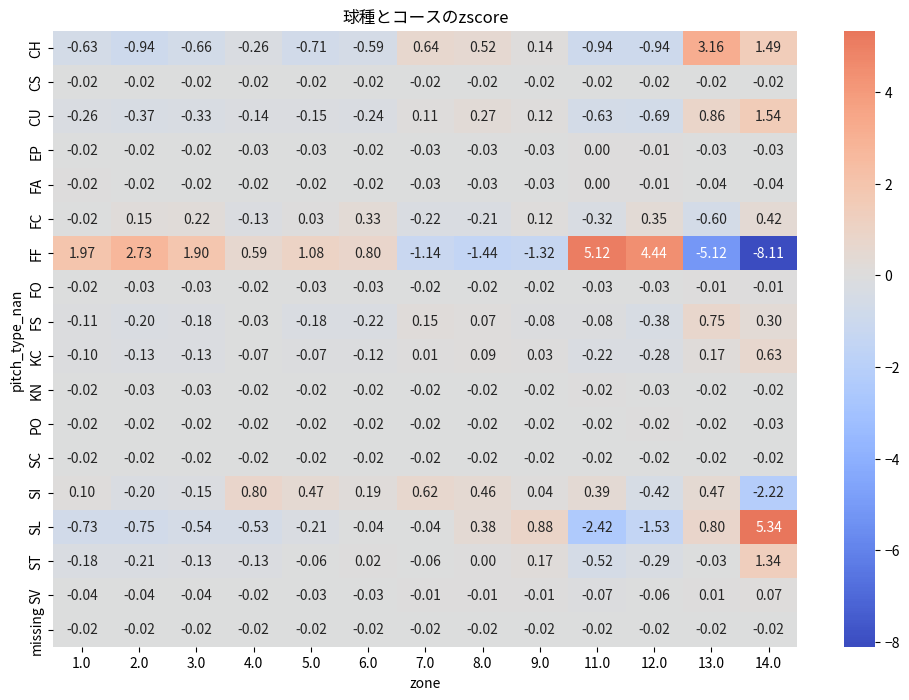

In [54]:
# 球種とカウントのZscore
import numpy as np
import seaborn as sns
from scipy.stats import zscore
df_copy['pitch_type_nan'] = df_copy['pitch_type'].fillna('missing')
df_copy["count"]
pitch_ratio_by_runner = (
    df_copy.groupby('zone')['pitch_type_nan']
    .value_counts(normalize=False)
    .unstack().T
)
pitch_ratio_by_runner['total'] = pitch_ratio_by_runner.sum(axis=1)       
pitch_ratio_by_runner.loc['total'] = pitch_ratio_by_runner.sum(axis=0)

pitch_ratio_by_runner=pitch_ratio_by_runner/3345239
#print(pitch_ratio_by_runner)
#print(df_copy.shape)

# 行の 'total'（各球種の合計）と列の 'total'（各塁状況の合計）を取得
row_totals = pitch_ratio_by_runner['total'].drop('total')  # Series
col_totals = pitch_ratio_by_runner.loc['total'].drop('total')  # Series
pitch_ratio_by_runner = pitch_ratio_by_runner.fillna(0)

# outer product で新しい DataFrame 作成
expected_df = pd.DataFrame(
    np.outer(row_totals, col_totals),
    index=row_totals.index,
    columns=col_totals.index
)
#print(expected_df)

residual_df = pitch_ratio_by_runner - expected_df

#print(residual_df)

from scipy.stats import zscore
residual_core = residual_df.loc[row_totals.index, col_totals.index]

# flattenして全体のZスコアを計算 → 元の形に戻す
flattened = residual_core.values.flatten()
flattened_z = zscore(flattened)

# reshapeしてDataFrameに変換
zscore_overall_df = pd.DataFrame(
    flattened_z.reshape(residual_core.shape),
    index=residual_core.index,
    columns=residual_core.columns
)

# runner_stateの列名をつける（任意）
#df_converted.columns = ['000', '001', '010', '011', '100', '101', '110', '111']

# 結果確認
print(zscore_overall_df)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(zscore_overall_df, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("球種とコースのzscore")
plt.show()

runner_state         000       001       010       011       100       101       110       111
pitch_type_nan                                                                                
CH             -0.826850 -0.090337  0.325205 -0.094275  1.053842 -0.031841  0.099931 -0.435421
CS              0.021353 -0.000461  0.001457 -0.002794 -0.014220 -0.000903 -0.003524 -0.001181
CU              2.225378 -0.005826  0.226781  0.008406 -1.879385 -0.144804 -0.152788 -0.277690
EP             -0.076079 -0.002649 -0.002891  0.002976  0.022180  0.007871  0.030047  0.018275
FA             -0.185213 -0.001484  0.006369  0.019204  0.021904  0.013760  0.067782  0.057410
FC             -1.393335  0.096843  0.116761  0.046245  0.955242  0.103000  0.082118 -0.006787
FF              8.154567 -0.567262 -2.242335 -0.712422 -1.003175 -0.945385 -2.391803 -0.290854
FO              0.008403 -0.001435  0.001632 -0.000025 -0.018044  0.001807  0.003836  0.003553
FS             -0.234603  0.036755  0.245547  0.09

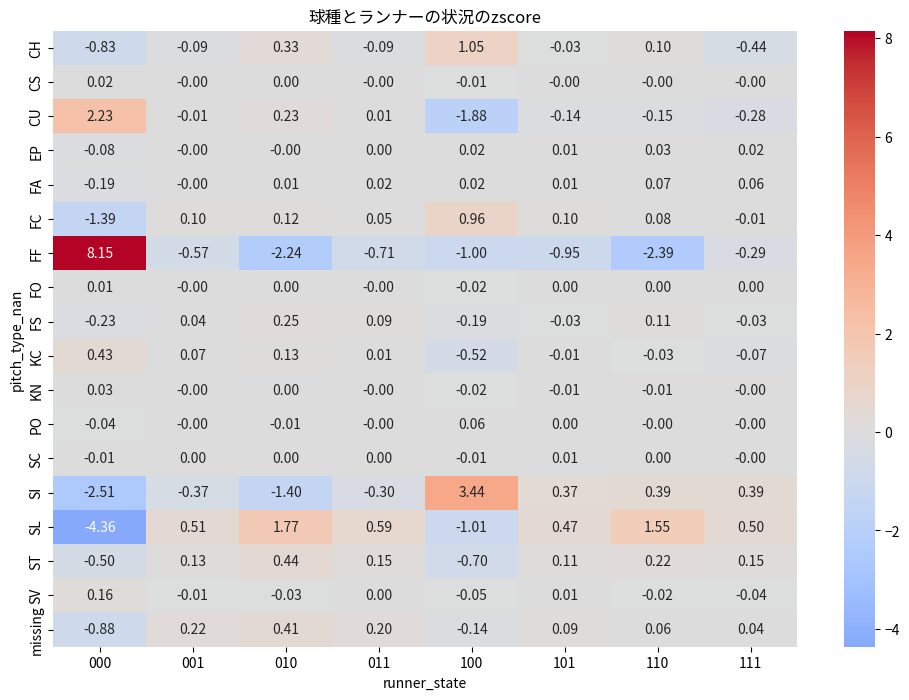

In [39]:
# 球種とランナー状況のZscore
import numpy as np
import seaborn as sns
# 塁状況ごとの球種割合
df_copy['runner_state'] = (
    df_copy['on_1b'].notnull().astype(int).astype(str) +
    df_copy['on_2b'].notnull().astype(int).astype(str) +
    df_copy['on_3b'].notnull().astype(int).astype(str)
)
# 例：'000' = ランナーなし, '010' = 二塁のみ, '111' = 満塁
df_copy['pitch_type_nan'] = df_copy['pitch_type'].fillna('missing')

pitch_ratio_by_runner = (
    df_copy.groupby('runner_state')['pitch_type_nan']
    .value_counts(normalize=False)
    .unstack().T
)
pitch_ratio_by_runner['total'] = pitch_ratio_by_runner.sum(axis=1)       
pitch_ratio_by_runner.loc['total'] = pitch_ratio_by_runner.sum(axis=0)

pitch_ratio_by_runner=pitch_ratio_by_runner/3345239
#print(pitch_ratio_by_runner)
#print(df_copy.shape)

# 行の 'total'（各球種の合計）と列の 'total'（各塁状況の合計）を取得
row_totals = pitch_ratio_by_runner['total'].drop('total')  # Series
col_totals = pitch_ratio_by_runner.loc['total'].drop('total')  # Series
pitch_ratio_by_runner = pitch_ratio_by_runner.fillna(0)

# outer product で新しい DataFrame 作成
expected_df = pd.DataFrame(
    np.outer(row_totals, col_totals),
    index=row_totals.index,
    columns=col_totals.index
)
#print(expected_df)

residual_df = pitch_ratio_by_runner - expected_df

#print(residual_df)

from scipy.stats import zscore
residual_core = residual_df.loc[row_totals.index, col_totals.index]

# flattenして全体のZスコアを計算 → 元の形に戻す
flattened = residual_core.values.flatten()
flattened_z = zscore(flattened)

# reshapeしてDataFrameに変換
zscore_overall_df = pd.DataFrame(
    flattened_z.reshape(residual_core.shape),
    index=residual_core.index,
    columns=residual_core.columns
)

# runner_stateの列名をつける（任意）
#df_converted.columns = ['000', '001', '010', '011', '100', '101', '110', '111']

# 結果確認
print(zscore_overall_df)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(zscore_overall_df, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("球種とランナーの状況のzscore")
plt.show()


In [36]:
print(pitch_ratio_by_runner.isna().sum())


runner_state
000      1
001      0
010      1
011      1
100      0
101      0
110      0
111      1
total    0
dtype: int64
